In [273]:
import pandas as pd
import sqlite3
from sqlite3 import Error
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

In [274]:
try:
    conn = sqlite3.connect("house_price.db")
    conn.execute("PRAGMA foreign_keys = 1")
except Error as e:
    print(e)


master_statement  = '''
                        SELECT * FROM 
                            Dwelling 
                            NATURAL JOIN Aeminities
                            NATURAL JOIN Construction
                            NATURAL JOIN Area
                            NATURAL JOIN Utility
                            NATURAL JOIN Sale
                    '''
master_statement2  = '''
                        SELECT LotFrontage, LotArea, MasVnrArea, GrLivArea, GarageArea, OverallQual, GarageCars from Dwelling 
                            NATURAL JOIN Aeminities
                            NATURAL JOIN Construction
                            NATURAL JOIN Area
                            NATURAL JOIN Utility
                            NATURAL JOIN Sale
							
                    '''

df = pd.read_sql_query(master_statement, conn)
df.drop(['Aeminities_id'], axis= 1, inplace=True)

df.drop(['Area_id'], axis= 1, inplace=True)

df.drop(['Construction_id'], axis= 1, inplace=True)

df.drop(['Dwelling_id'], axis= 1, inplace=True)

df.drop(['Utility_id'], axis= 1, inplace=True)



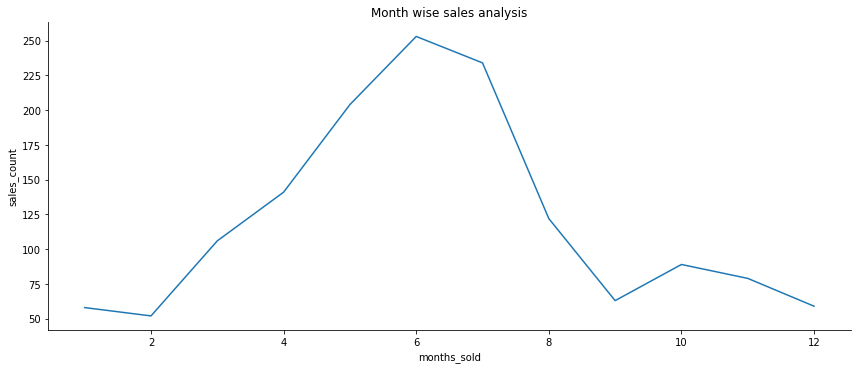

In [275]:
#SCT month_count_sold
try:
    conn = sqlite3.connect("house_price.db")
    conn.execute("PRAGMA foreign_keys = 1")
except Error as e:
    print(e)


master_statement  = '''
                        select MoSold as months_sold, count(1) as sales_count
from Sale
group by MoSold
order by sales_count desc
							
                    '''

df_month_count_sold = pd.read_sql_query(master_statement, conn)
sns.relplot(
    data=df_month_count_sold, 
    x="months_sold", y="sales_count",
    height=5, aspect=2.4, 
    kind="line"
).set(title="Month wise sales analysis")



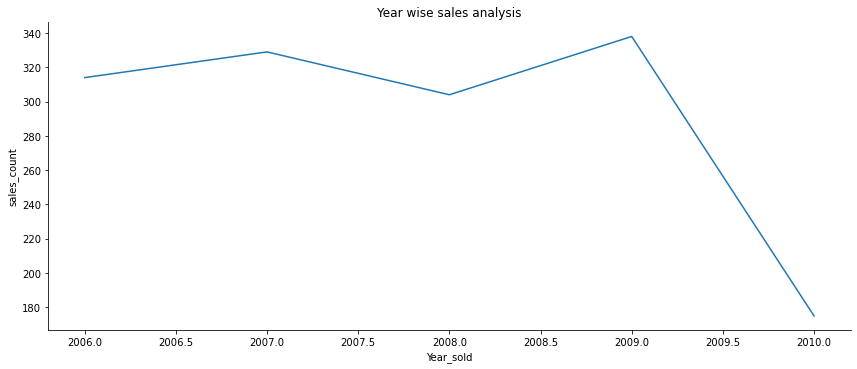

In [276]:
#SCT year_count_sold
try:
    conn = sqlite3.connect("house_price.db")
    conn.execute("PRAGMA foreign_keys = 1")
except Error as e:
    print(e)


master_statement  = '''
                        select YrSold as Year_sold, count(1) as sales_count
from Sale
group by YrSold
order by sales_count desc
							
                    '''

df_year_count_sold = pd.read_sql_query(master_statement, conn)

sns.relplot(
    data=df_year_count_sold, 
    x="Year_sold", y="sales_count",
    height=5, aspect=2.4, 
    kind="line"
).set(title="Year wise sales analysis")




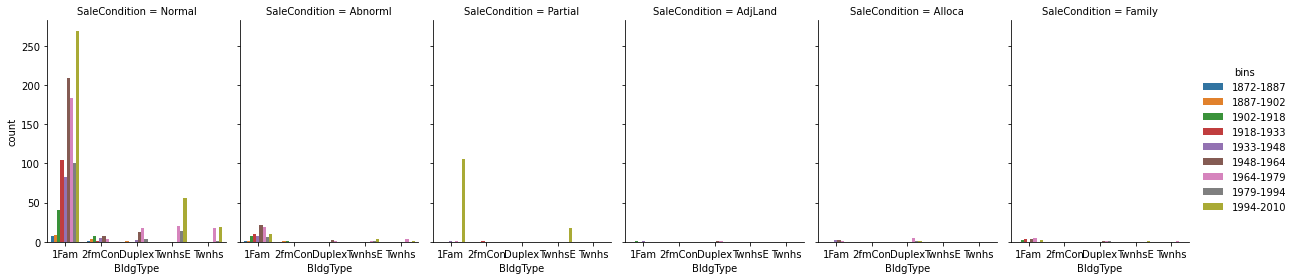

In [277]:
#SCT SaleCondition_count_sold
try:
    conn = sqlite3.connect("house_price.db")
    conn.execute("PRAGMA foreign_keys = 1")
except Error as e:
    print(e)


master_statement  = '''
                        select SaleCondition, YearBuilt, BldgType
FROM Sale NATURAL JOIN Construction NATURAL JOIN Dwelling
							
                    '''

sale_conditions_df = pd.read_sql_query(master_statement, conn)

import seaborn as sns
min_value = sale_conditions_df['YearBuilt'].min()
max_value = sale_conditions_df['YearBuilt'].max()

import numpy as np
bins =np.linspace(min_value,max_value,10)
bins =[int(i) for i in bins]

labels = []
for ind,i in enumerate(bins):
    try:
        labels.append(str(i)+'-'+str(bins[ind+1]))
    except:
        pass
sale_conditions_df['bins'] = pd.cut(sale_conditions_df['YearBuilt'], bins=bins, labels=labels, include_lowest=True)

g = sns.catplot(hue="bins", x="BldgType", col="SaleCondition",
                data=sale_conditions_df, kind="count",
                height=4, aspect=.7)

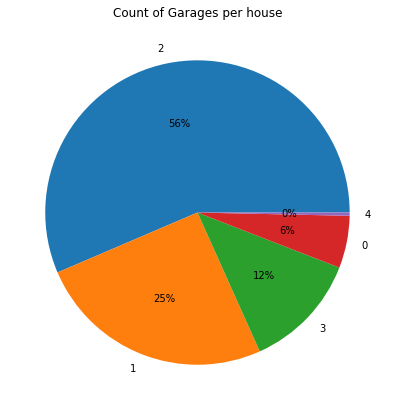

In [278]:
#SCT GarageCars
try:
    conn = sqlite3.connect("house_price.db")
    conn.execute("PRAGMA foreign_keys = 1")
except Error as e:
    print(e)


master_statement  = '''
                        select GarageCars, LotArea, SalePrice/LotArea
from Sale NATURAL JOIN Utility NATURAL JOIN Area
							
                    '''

df_GarageCars_count_sold = pd.read_sql_query(master_statement, conn)
value_counts_garage = pd.DataFrame(df_GarageCars_count_sold.GarageCars.value_counts(normalize = True))
value_counts_garage['GarageCars']
value_counts_garage.index
from matplotlib import pyplot as plt
import numpy as np
cars = value_counts_garage.index
data = value_counts_garage['GarageCars']
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = cars,   autopct=lambda p: '{:.0f}%'.format(p))
plt.title('Count of Garages per house')
plt.show()


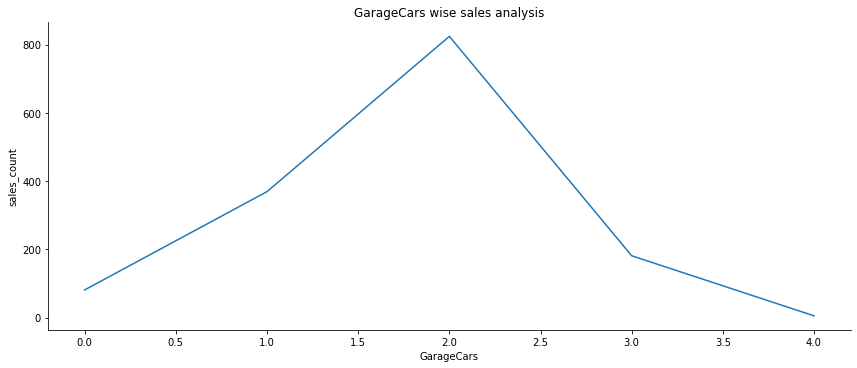

In [281]:
#SCT GarageCars_count_sold
try:
    conn = sqlite3.connect("house_price.db")
    conn.execute("PRAGMA foreign_keys = 1")
except Error as e:
    print(e)


master_statement  = '''
                        select GarageCars, count(1) as sales_count
from Sale JOIN Utility ON Sale.Id = Utility.Id
group by GarageCars
order by sales_count desc
							
                    '''

df_GarageCars_count_sold = pd.read_sql_query(master_statement, conn)

sns.relplot(
    data=df_GarageCars_count_sold, 
    x="GarageCars", y="sales_count",
    height=5, aspect=2.4, 
    kind="line"
).set(title="GarageCars wise sales analysis")
# df_year_count_sold['YearBuilt'].unique()
# df_year_count_sold.to_csv('GarageCars_count.csv')
# df_GarageCars_count_sold


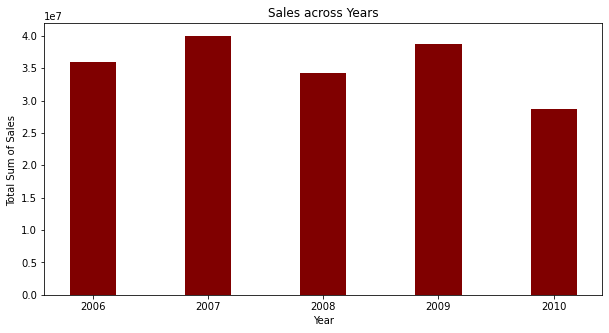

In [280]:
#SCT month_sold_ranking_count_sold
try:
    conn = sqlite3.connect("house_price.db")
    conn.execute("PRAGMA foreign_keys = 1")
except Error as e:
    print(e)


master_statement  = '''
                        select * from
(
select YrSold,MoSold, price_sum, row_number() over (partition by YrSold order by price_sum desc) as ranking
from (
select YrSold, MoSold, sum(SalePrice) as price_sum 
from Sale
group by YrSold, MoSold
)  a
) b
where ranking <=5 
order by YrSold,ranking
							
                    '''

month_sold_ranking_count_sold = pd.read_sql_query(master_statement, conn)
groups = month_sold_ranking_count_sold.groupby(['YrSold'])['price_sum'].sum()
sales = pd.DataFrame(groups)
import numpy as np
import matplotlib.pyplot as plt
years = sales.index
values = sales['price_sum']
fig = plt.figure(figsize = (10, 5))
plt.bar(years, values, color ='maroon',
width = 0.4)
plt.xlabel("Year")
plt.ylabel("Total Sum of Sales ")
plt.title("Sales across Years")
plt.show()

In [108]:
df.isnull().sum().sort_values(ascending = False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
OverallCond       0
OverallQual       0
LandSlope         0
LotConfig         0
SalePrice         0
Length: 81, dtype: int64

In [109]:
X, y  = df.iloc[0:,0:85], df.iloc[0:,85:86]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=42)

In [111]:
DATA=df
DATA['MSZoning'].fillna("RL", inplace=True)
DATA.LotFrontage.fillna(0, inplace=True)
DATA.Alley.fillna("NO", inplace=True)
DATA.Utilities.fillna('AllPub', inplace=True)
DATA.Exterior1st.fillna("VinylSd", inplace=True)
DATA.Exterior2nd.fillna("VinylSd", inplace=True)
DATA.MasVnrArea.fillna(0., inplace=True)
DATA.BsmtCond.fillna("No", inplace=True)
DATA.BsmtExposure.fillna("NB", inplace=True)
DATA.BsmtFinType1.fillna("NB", inplace=True)
DATA.BsmtFinSF1.fillna(0., inplace=True)
DATA.BsmtFinSF2.fillna(0., inplace=True)
DATA.BsmtUnfSF.fillna(0., inplace=True)
DATA.TotalBsmtSF.fillna(0., inplace=True)
DATA.Electrical.fillna("SBrkr", inplace=True)
DATA.BsmtFullBath.fillna(0., inplace=True)
DATA.BsmtHalfBath.fillna(0., inplace=True)
DATA.KitchenQual.fillna("TA", inplace=True)
DATA.Functional.fillna('Typ', inplace=True)
DATA.FireplaceQu.fillna("No", inplace=True)
DATA.GarageType.fillna("No", inplace=True)
DATA.GarageYrBlt.fillna(0, inplace=True)
DATA.GarageFinish.fillna("No", inplace=True)
DATA.GarageCars.fillna(0, inplace=True)
DATA.GarageArea.fillna(0, inplace=True)
DATA.GarageQual.fillna("No", inplace=True)
DATA.GarageCond.fillna("No", inplace=True)
DATA.PoolQC.fillna("No", inplace=True)
DATA.Fence.fillna("No", inplace=True)
DATA.MiscFeature.fillna("No", inplace=True)
DATA.SaleType.fillna("Con", inplace=True)
DATA.SaleCondition.fillna("Normal", inplace=True)

DATA.BsmtFullBath.replace(3.0, 2.0, inplace=True)
DATA.BsmtFullBath = DATA.BsmtFullBath.astype('int')
DATA.BsmtHalfBath = DATA.BsmtHalfBath.astype('int')
DATA.KitchenAbvGr = pd.cut(DATA.KitchenAbvGr, 2)
DATA.KitchenAbvGr = DATA.KitchenAbvGr.astype(
    'category').cat.rename_categories([0, 1])
DATA.TotRmsAbvGrd = DATA.TotRmsAbvGrd.apply(lambda row: 4 if row < 5 else 10)
DATA.Fireplaces = DATA.Fireplaces.apply(lambda row: 2 if row >= 2 else row)
DATA.Fireplaces = DATA.Fireplaces.astype('int')
DATA['GarageAgeCat'] = DATA.GarageYrBlt.apply(
    lambda row: 'recent' if row >= 2000 else 'old')
DATA.GarageCars = DATA.GarageCars.astype('int')


In [112]:
DATA['GarageAgeCat']


0       recent
1          old
2       recent
3          old
4       recent
         ...  
1455       old
1456       old
1457       old
1458       old
1459       old
Name: GarageAgeCat, Length: 1460, dtype: object

In [183]:
DATA.columns

Index(['Id', 'LotFrontage', 'OverallQual', 'MasVnrArea', 'LotArea',
       'GrLivArea', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice',
       ...
       'SaleCondition_Partial', 'LotConfig_Corner', 'LotConfig_CulDSac',
       'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside',
       'GarageAgeCat_old', 'GarageAgeCat_recent', 'Utilities_AllPub',
       'Utilities_NoSeWa'],
      dtype='object', length=288)

In [113]:
DATA['LotFrontage'] = DATA.groupby(['Neighborhood', 'Street'])[
    'LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [114]:
DATA['KitchenAbvGr']

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: KitchenAbvGr, Length: 1460, dtype: category
Categories (2, int64): [0 < 1]

In [115]:
# DATA.KitchenAbvGr = pd.cut(DATA.KitchenAbvGr, 2)
DATA.KitchenAbvGr = DATA.KitchenAbvGr.astype(
    'category').cat.rename_categories([1, 2])
DATA.TotRmsAbvGrd = DATA.TotRmsAbvGrd.apply(lambda row: 4 if row < 5 else 10)
DATA.Fireplaces = DATA.Fireplaces.apply(lambda row: 2 if row >= 2 else row)
DATA.Fireplaces = DATA.Fireplaces.astype('int')
DATA['GarageAgeCat'] = DATA.GarageYrBlt.apply(
    lambda row: 'recent' if row >= 2000 else 'old')
DATA.GarageCars = DATA.GarageCars.astype('int')


In [116]:
marks = {"No": 0, "Po": 1, 'Fa': 2, "TA": 3, 'Gd': 4, 'Ex': 5}


def mark_to_num(mark):
    return marks[mark]


DATA['ExterQual'] = DATA['ExterQual'].apply(mark_to_num)
DATA['ExterCond'] = DATA['ExterCond'].apply(mark_to_num)
DATA['HeatingQC'] = DATA['HeatingQC'].apply(mark_to_num)
DATA['KitchenQual'] = DATA['KitchenQual'].apply(mark_to_num)
DATA['FireplaceQu'] = DATA['FireplaceQu'].apply(mark_to_num)
DATA['GarageQual'] = DATA['GarageQual'].apply(mark_to_num)
DATA['GarageCond'] = DATA['GarageCond'].apply(mark_to_num)
DATA['PoolQC'] = DATA['PoolQC'].apply(mark_to_num)


In [118]:
DATA['BsmtFinSF'] = DATA.BsmtFinSF1 + DATA.BsmtFinSF2
DATA['Porch'] = DATA.ScreenPorch + DATA.EnclosedPorch + \
    DATA.OpenPorchSF + DATA.WoodDeckSF
DATA['Total_surface'] = DATA.TotalBsmtSF + DATA['_1stFlrSF'] + DATA['_2ndFlrSF']
DATA['Age'] = DATA.YrSold - DATA.YearBuilt
DATA['RemodAge'] = DATA.YrSold - DATA.YearRemodAdd
DATA['GarageAge'] = DATA.YrSold - DATA.GarageYrBlt


DATA['Overall'] = DATA['OverallCond'] * DATA.OverallQual
DATA['External_Overall'] = DATA['ExterCond'] * DATA['ExterQual']


In [119]:


drop_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'LowQualFinSF', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '_3SsnPorch', 'ScreenPorch', 'PoolArea',
             'MiscVal', 'MoSold', 'YrSold', '_1stFlrSF', '_2ndFlrSF', 'BsmtUnfSF', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd']
numeric = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF', 'GrLivArea', 'GarageArea',
           'Porch', 'Total_surface', 'Age', 'RemodAge', 'OverallQual', 'GarageCars', 'GarageAge']
categorical = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LandSlope', 'Neighborhood',
               'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
               'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
               'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
               'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'LotConfig', 'GarageAgeCat', 'Utilities']
DATA.drop(drop_cols, axis=1, inplace=True)
DATA[categorical] = DATA[categorical].astype('category')
DATA[numeric] = DATA[numeric].astype('float')


In [154]:
numeric1 = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF', 'GrLivArea', 'GarageArea',
           'Porch', 'Total_surface', 'RemodAge', 'OverallQual', 'GarageCars', 'GarageAge','SalesPrice']

In [155]:
# sns.pairplot(DATA[numeric])


In [164]:
DATA.info

<bound method DataFrame.info of         Id  LotFrontage  OverallQual  MasVnrArea  LotArea  GrLivArea  \
0        1         65.0          7.0       196.0   8450.0     1710.0   
1        2         80.0          6.0         0.0   9600.0     1262.0   
2        3         68.0          7.0       162.0  11250.0     1786.0   
3        4         60.0          7.0         0.0   9550.0     1717.0   
4        5         84.0          8.0       350.0  14260.0     2198.0   
...    ...          ...          ...         ...      ...        ...   
1455  1456         62.0          6.0         0.0   7917.0     1647.0   
1456  1457         85.0          6.0       119.0  13175.0     2073.0   
1457  1458         66.0          7.0         0.0   9042.0     2340.0   
1458  1459         68.0          5.0         0.0   9717.0     1078.0   
1459  1460         75.0          5.0         0.0   9937.0     1256.0   

      GarageYrBlt  GarageCars  GarageArea  SalePrice  ...  \
0          2003.0         2.0       548.0 

In [162]:
#SCT 
#month frequency
penguins = sns.load_dataset("penguins")
sns.histplot(data=DATA['YrSold'], x="flipper_length_mm")

KeyError: 'YrSold'

<AxesSubplot:>

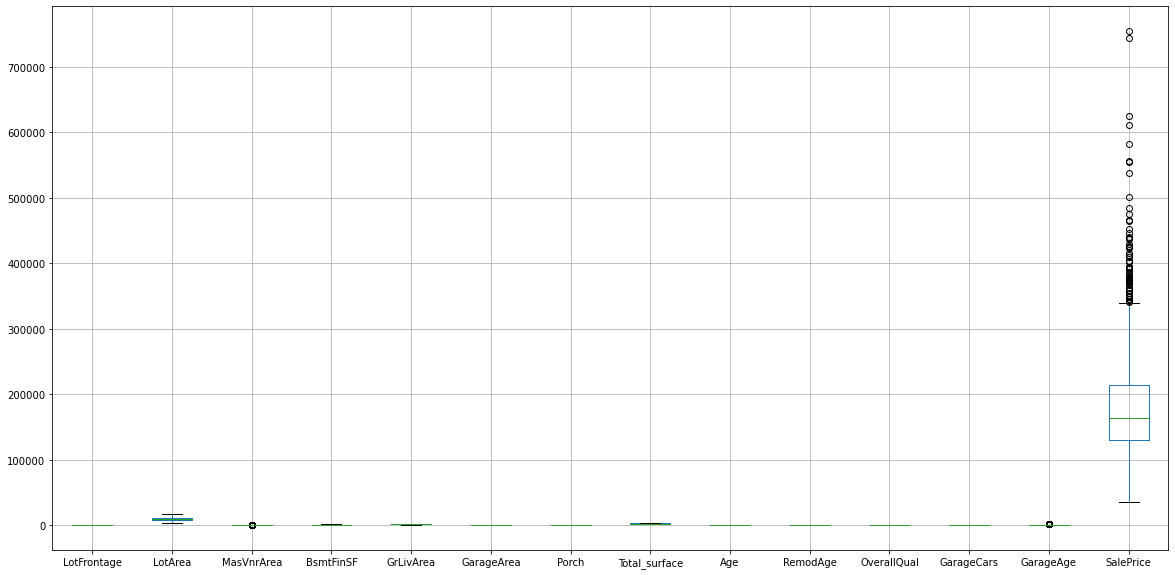

In [156]:
import matplotlib
matplotlib.rc('figure', figsize=(20, 10))

DATA[numeric].boxplot()


In [123]:
DATA[numeric].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   float64
 2   MasVnrArea     1460 non-null   float64
 3   BsmtFinSF      1460 non-null   float64
 4   GrLivArea      1460 non-null   float64
 5   GarageArea     1460 non-null   float64
 6   Porch          1460 non-null   float64
 7   Total_surface  1460 non-null   float64
 8   Age            1460 non-null   float64
 9   RemodAge       1460 non-null   float64
 10  OverallQual    1460 non-null   float64
 11  GarageCars     1460 non-null   float64
 12  GarageAge      1460 non-null   float64
dtypes: float64(13)
memory usage: 148.4 KB


0.0 104.0
3311.7000000000003 17401.149999999998
0.0 456.0
0.0 1309.0
848.0 2466.1
0.0 850.0999999999999
0.0 462.1999999999998
1535.95 3973.3999999999996
1.0 91.0
0.0 58.0
4.0 8.0
0.0 3.0
0.0 2006.0


<AxesSubplot:>

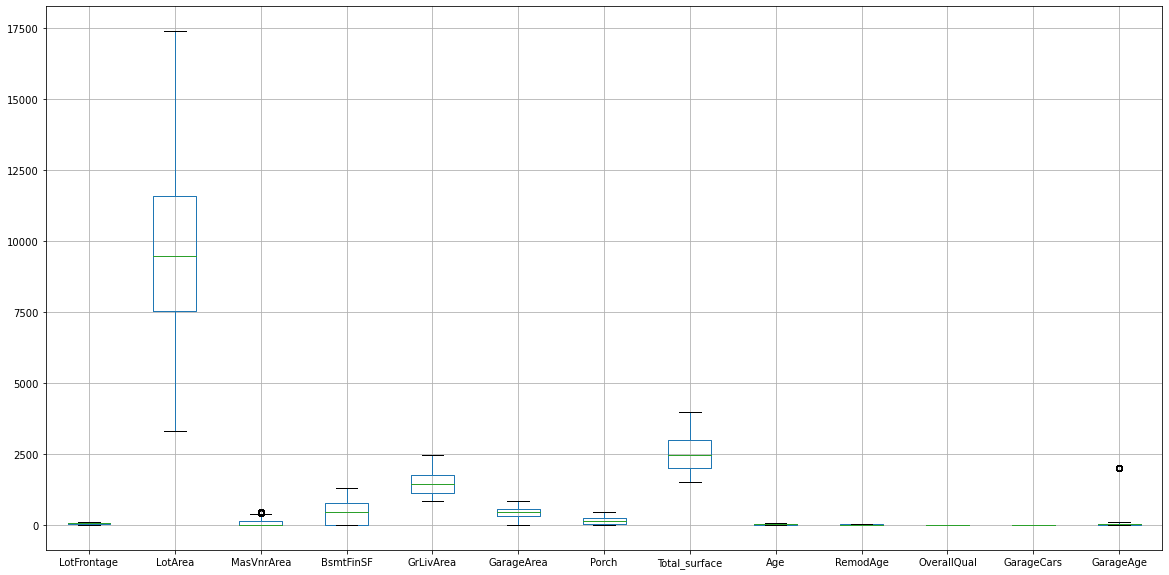

In [124]:

for i in numeric:
    lower = df[i].quantile(.05)
    upper = df[i].quantile(.95)
    print(lower, upper)
    DATA[i] = DATA[i].clip(lower=lower, upper=upper)
    
DATA[numeric].boxplot()


In [125]:
# sns.heatmap(DATA[numeric])

In [126]:
len(categorical)


50

In [127]:
DATA.SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [128]:
l = numeric

l.append('SalePrice')


<AxesSubplot:>

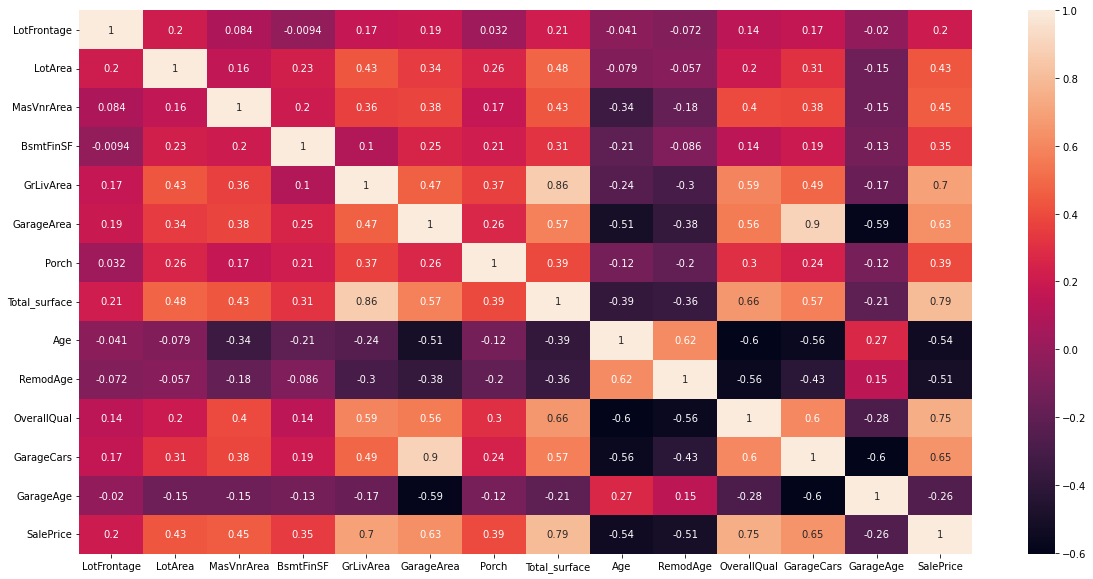

In [129]:


sns.heatmap(DATA[l].corr(),annot=True)


<AxesSubplot:ylabel='Frequency'>

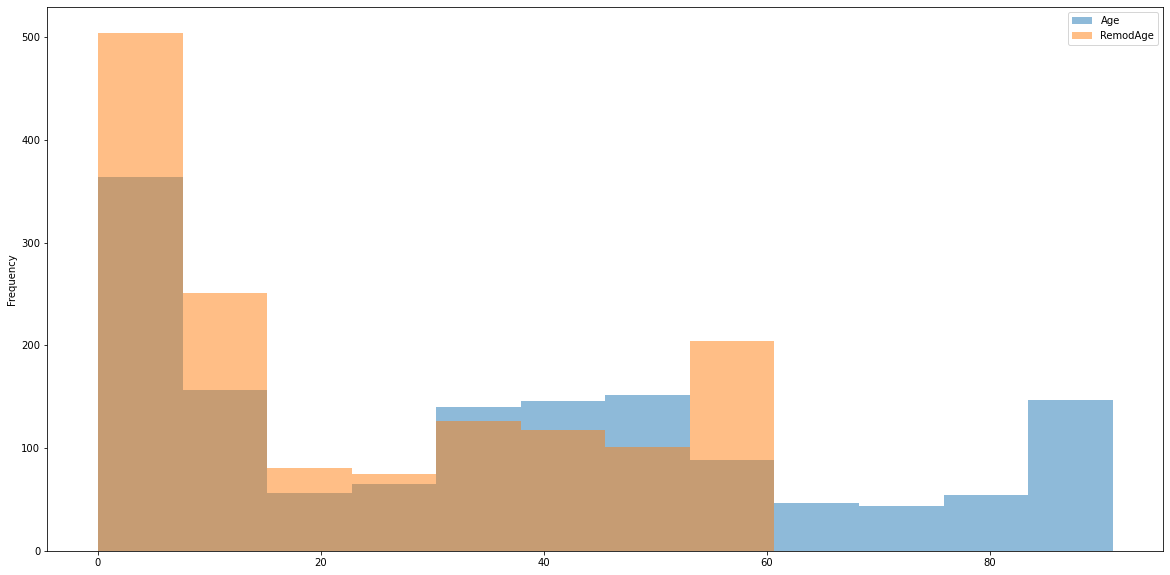

In [130]:
DATA[['Age','RemodAge']].plot.hist(bins=12, alpha=0.5)


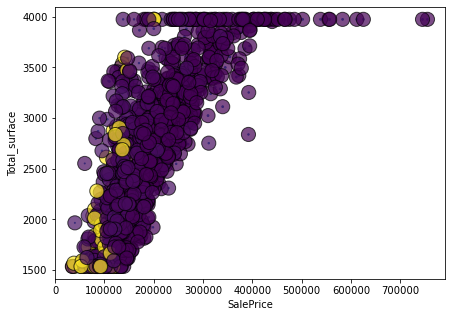

In [131]:
# plt.bar(DATA[['Age','GarageCars']])
DATA.plot.scatter('SalePrice', 'Total_surface', 'GarageCars', marker='o', figsize=(7,5))
plt.scatter(DATA.SalePrice, DATA.Total_surface,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=DATA.GarageAge)

Text(0.5, 0, 'y-Total_surface')

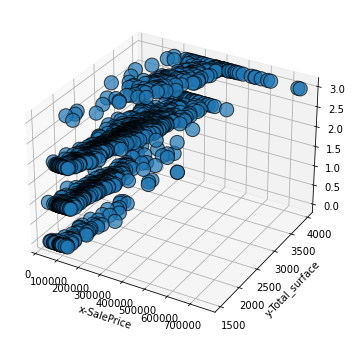

In [132]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(DATA.SalePrice, DATA.Total_surface,DATA.GarageCars,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           )
plt.xlabel("x-SalePrice")
plt.ylabel("y-Total_surface")
# plt.set_zlabel("y-GarageCars")


<AxesSubplot:xlabel='GrLivArea', ylabel='Total_surface'>

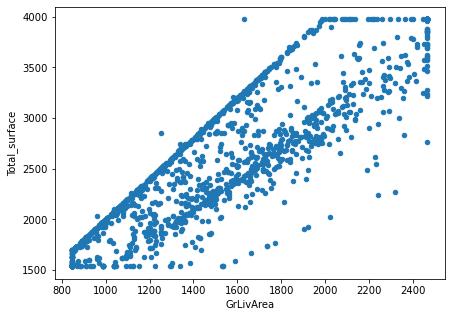

In [133]:
DATA.plot.scatter(x='GrLivArea', y='Total_surface', marker='o', figsize=(7,5))


<AxesSubplot:ylabel='Frequency'>

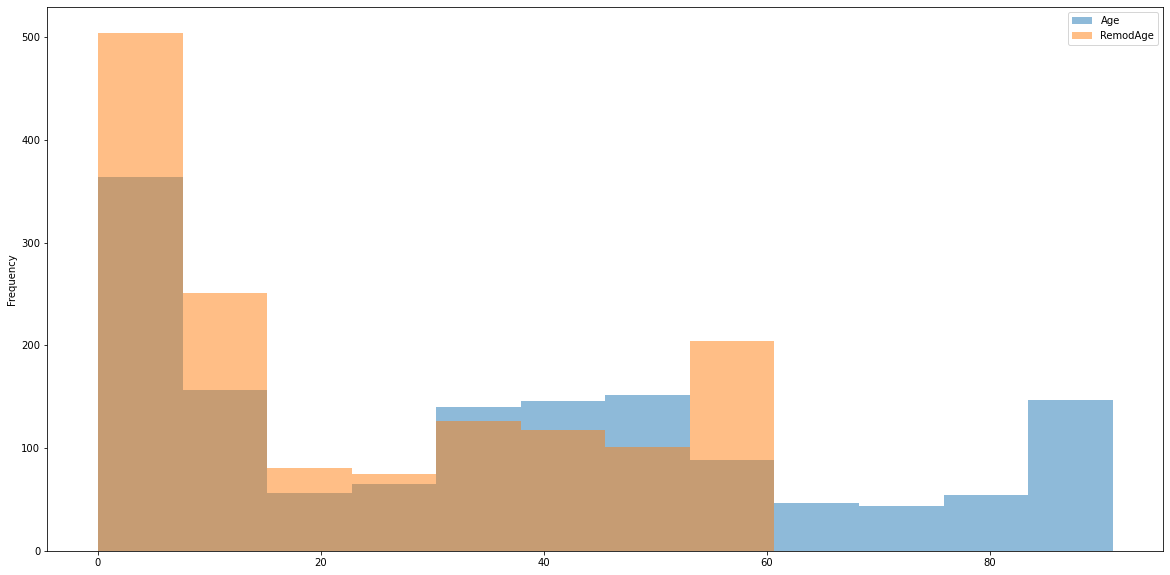

In [134]:
DATA[['Age','RemodAge']].plot.hist(bins=12, alpha=0.5)


In [135]:


DATA = pd.get_dummies(DATA, columns=categorical)


In [136]:
DATA

Id  LotFrontage Condition1 Condition2  OverallQual Exterior1st  \
0        1         65.0       Norm       Norm          7.0     VinylSd   
1        2         80.0      Feedr       Norm          6.0     MetalSd   
2        3         68.0       Norm       Norm          7.0     VinylSd   
3        4         60.0       Norm       Norm          7.0     Wd Sdng   
4        5         84.0       Norm       Norm          8.0     VinylSd   
...    ...          ...        ...        ...          ...         ...   
1455  1456         62.0       Norm       Norm          6.0     VinylSd   
1456  1457         85.0       Norm       Norm          6.0     Plywood   
1457  1458         66.0       Norm       Norm          7.0     CemntBd   
1458  1459         68.0       Norm       Norm          5.0     MetalSd   
1459  1460         75.0       Norm       Norm          5.0     HdBoard   

     Exterior2nd  MasVnrArea  LotArea  GrLivArea  ...  SaleCondition_Partial  \
0        VinylSd       196.0   8450.0     1710.0  ...                      0   
1        MetalSd         0.0   9600.0     1262.0  ...                      0   
2        VinylSd       162.0  11250.0     1786.0  ...                      0   
3        Wd Shng         0.0   9550.0     1717.0  ...                      0   
4        VinylSd       350.0  14260.0     2198.0  ...                      0   
...          ...         ...      ...        ...  ...                    ...   
1455     VinylSd         0.0   7917.0     1647.0  ...                      0   
1456     Plywood       119.0  13175.0     2073.0  ...                      0   
1457     CmentBd         0.0   9042.0     2340.0  ...                      0   
1458     MetalSd         0.0   9717.0     1078.0  ...                      0   
1459     HdBoard         0.0   9937.0     1256.0  ...                      0   

      LotConfig_Corner  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                    0                  0              0              0   
1                    0                  0              1              0   
2                    0                  0              0              0   
3                    1                  0              0              0   
4                    0                  0              1              0   
...                ...                ...            ...            ...   
1455                 0                  0              0              0   
1456                 0                  0              0              0   
1457                 0                  0              0              0   
1458                 0                  0              0              0   
1459                 0                  0              0              0   

      LotConfig_Inside  GarageAgeCat_old  GarageAgeCat_recent  \
0                    1                 0                    1   
1                    0                 1                    0   
2                    1                 0                    1   
3                    0                 1                    0   
4                    0                 0                    1   
...                ...               ...                  ...   
1455                 1                 1                    0   
1456                 1                 1                    0   
1457                 1                 1                    0   
1458                 1                 1                    0   
1459                 1                 1                    0   

      Utilities_AllPub  Utilities_NoSeWa  
0                    1                 0  
1                    1                 0  
2                    1                 0  
3                    1                 0  
4                    1                 0  
...                ...               ...  
1455                 1                 0  
1456                 1                 0  
1457                 1                 0  
1458                 1                 0  
145

In [137]:
DATA=DATA.drop(['Exterior1st'],axis=1)
DATA=DATA.drop(['Condition1','Condition2'],axis=1)
DATA=DATA.drop(['Exterior2nd'],axis=1)



In [138]:
list(DATA.columns)

['Id',
 'LotFrontage',
 'OverallQual',
 'MasVnrArea',
 'LotArea',
 'GrLivArea',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'SalePrice',
 'BsmtFinSF',
 'Porch',
 'Total_surface',
 'Age',
 'RemodAge',
 'GarageAge',
 'Overall',
 'External_Overall',
 'MSSubClass_20',
 'MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSSubClass_90',
 'MSSubClass_120',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSSubClass_190',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'Alley_Grvl',
 'Alley_NO',
 'Alley_Pave',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'LandSlope_Gtl',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_

In [139]:
x=DATA
x=x.drop('SalePrice',axis=1)
x
y=DATA['SalePrice']

# Break off validation set from training data
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [140]:
x.isnull().sum().sort_values(ascending = False)

Id                  0
HalfBath_1          0
BedroomAbvGr_4      0
BedroomAbvGr_3      0
BedroomAbvGr_2      0
                   ..
OverallCond_5       0
OverallCond_4       0
OverallCond_3       0
OverallCond_2       0
Utilities_NoSeWa    0
Length: 287, dtype: int64

In [141]:
type(y)
y.isnull().sum()

0

In [142]:


X_train, X_valid, y_train, y_valid = train_test_split(x, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Get validation predictions and MAE

preds_valid = model.predict(X_valid)
print("RMSE (random forest approach):")
print(mean_squared_error(y_valid, preds_valid))

RMSE (random forest approach):
1075986067.7524388


In [117]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.preprocessing import RobustScaler

In [118]:
svr = make_pipeline(RobustScaler(), SVR(C=20, epsilon = 0.008, gamma= 0.0003))

In [119]:
svr_model = svr.fit(X_train, y_train)

In [ ]:
svr_predict = svr.predict(X_valid)
print(mean_squared_error(y_valid, preds_valid))

from xgboost 

In [115]:
from xgboost import XGBRegressor

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
DATA['']

0          Dwel_1
1          Dwel_2
2          Dwel_3
3          Dwel_4
4          Dwel_5
          ...    
2914    Dwel_2915
2915    Dwel_2916
2916    Dwel_2917
2917    Dwel_2918
2918    Dwel_2919
Name: Dwelling_id, Length: 2919, dtype: object

In [160]:
DATA

Id  LotFrontage  OverallQual  MasVnrArea  LotArea  GrLivArea  \
0        1         65.0          7.0       196.0   8450.0     1710.0   
1        2         80.0          6.0         0.0   9600.0     1262.0   
2        3         68.0          7.0       162.0  11250.0     1786.0   
3        4         60.0          7.0         0.0   9550.0     1717.0   
4        5         84.0          8.0       350.0  14260.0     2198.0   
...    ...          ...          ...         ...      ...        ...   
1455  1456         62.0          6.0         0.0   7917.0     1647.0   
1456  1457         85.0          6.0       119.0  13175.0     2073.0   
1457  1458         66.0          7.0         0.0   9042.0     2340.0   
1458  1459         68.0          5.0         0.0   9717.0     1078.0   
1459  1460         75.0          5.0         0.0   9937.0     1256.0   

      GarageYrBlt  GarageCars  GarageArea  SalePrice  ...  \
0          2003.0         2.0       548.0     208500  ...   
1          1976.0         2.0       460.0     181500  ...   
2          2001.0         2.0       608.0     223500  ...   
3          1998.0         3.0       642.0     140000  ...   
4          2000.0         3.0       836.0     250000  ...   
...           ...         ...         ...        ...  ...   
1455       1999.0         2.0       460.0     175000  ...   
1456       1978.0         2.0       500.0     210000  ...   
1457       1941.0         1.0       252.0     266500  ...   
1458       1950.0         1.0       240.0     142125  ...   
1459       1965.0         1.0       276.0     147500  ...   

      SaleCondition_Partial  LotConfig_Corner  LotConfig_CulDSac  \
0                         0                 0                  0   
1                         0                 0                  0   
2                         0                 0                  0   
3                         0                 1                  0   
4                         0                 0                  0   
...                     ...               ...                ...   
1455                      0                 0                  0   
1456                      0                 0                  0   
1457                      0                 0                  0   
1458                      0                 0                  0   
1459                      0                 0                  0   

      LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  GarageAgeCat_old  \
0                 0              0                 1                 0   
1                 1              0                 0                 1   
2                 0              0                 1                 0   
3                 0              0                 0                 1   
4                 1              0                 0                 0   
...             ...            ...               ...               ...   
1455              0              0                 1                 1   
1456              0              0                 1                 1   
1457              0              0                 1                 1   
1458              0              0                 1                 1   
1459              0              0                 1                 1   

      GarageAgeCat_recent  Utilities_AllPub  Utilities_NoSeWa  
0                       1                 1                 0  
1                       0                 1                 0  
2                       1                 1                 0  
3                       0                 1                 0  
4                       1                 1                 0  
...                   ...               ...               ...  
1455                    0                 1                 0  
1456                    0                 1                 0  
1457                    0                 1                 0  
1458                    0                 1                 0  
